# Learning process in transformers

This notebook illustrates how transformers learn. For easier visualization, we will only use one self-attention head with one transformer block.

In [14]:
import torch
from torchviz import make_dot

from IPython.display import Image, display

from utils import estimate_loss, get_batch, get_training_corpus, decode, train_val_split
from language_model import SimpleLanguageModel

# hyperparameters
batch_size = 4  # how many independent sequences will we process in parallel?
block_size = 8  # what is the maximum context length for predictions?
max_iters = 1
eval_interval = 1
learning_rate = 1e-3
device = "cuda" if torch.cuda.is_available() else "cpu"
eval_iters = 1
n_embd = 16
n_head = 1
n_layer = 1
dropout = 0.0
# ------------


## Setup training data

In [2]:

torch.manual_seed(1337)

text, vocab_size = get_training_corpus()
train_data, val_data = train_val_split(text)


Download successful!


## Setup model and optimizer

In [3]:
model = SimpleLanguageModel(
    vocab_size, n_embd, block_size, n_head, n_layer, dropout, device
)
m = model.to(device)
# print the number of parameters in the model
print(sum(p.numel() for p in m.parameters()) / 1e6, "M parameters")

# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

0.005537 M parameters


## Forward pass with one batch of data

In [4]:
xb, yb = get_batch("train", device, train_data, val_data, block_size, batch_size)
logits, loss = model(xb, yb)

## Create graph of the model

In [7]:
dot = make_dot(logits, params=dict(model.named_parameters()))

# Save the dot object or print it.
dot.format = 'png'
dot.render("network_graph")

'network_graph.png'

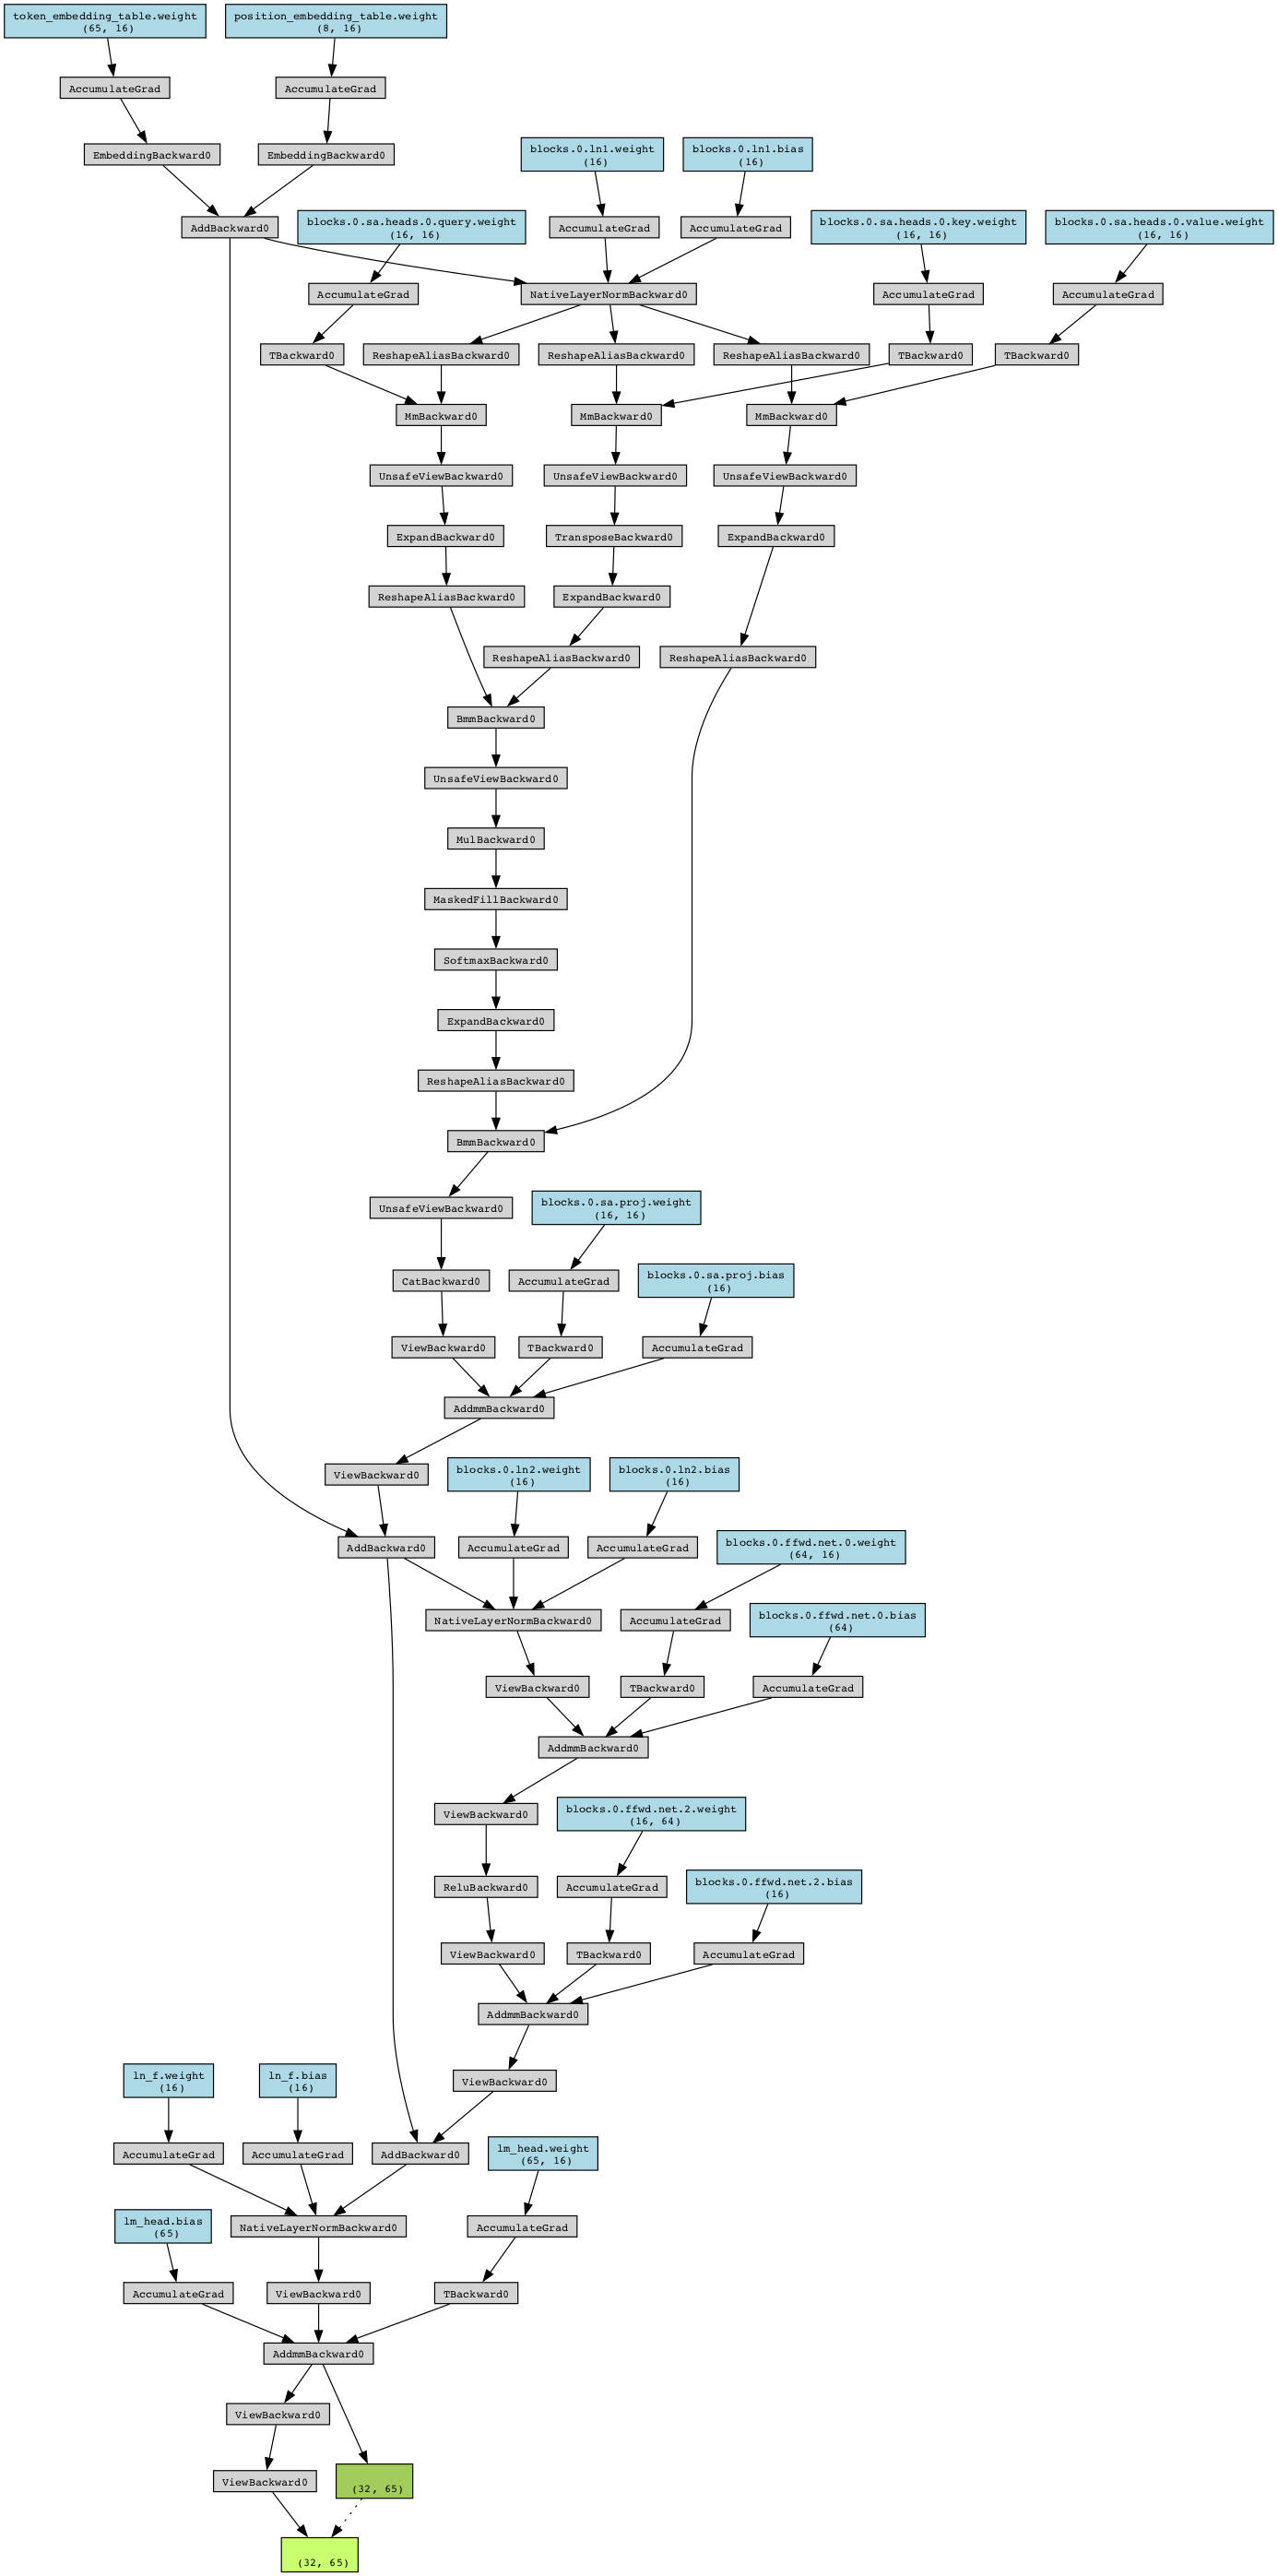

In [16]:
dot.view()
display(Image(filename='network_graph.png'))